## 1 A Single Neuron
- 딥러닝의 핵심은 뉴런을 쌓아 만든 신경망으로 뉴런은 단순한 계산만 수행하지만 이들이 결합하면서 복잡한 모델이 만들어짐
- 선형유닛신경망의 기본요소인 뉴런은 입력값에 가중치를 곱하고 편향을 추가한 후 최종 출력을 계산하는 형태
- Keras에서느 선형유닛인 Keras.Sequential을 사용하여 계층을 쌓는 방식으로 모델을 만들 수 있음

In [7]:
from tensorflow import keras
from tensorflow.keras import layers

# Create a network with 1 linear unit
model = keras.Sequential([
    # Dense 레이어를 통해 정의할 수 있음
    # units을 1로 출력 하나로 설정하고 input_shape=[3]으로 세개의 입력 특성 받도록 지정
    layers.Dense(units=1, input_shape=[3])
])

## 2 Deep Neural Network
- 신경망 구축하기
- 핵심 개념은 modularity로 간단한 기능 단위를 조합하여 복잡한 네트워크를 만드는 것임

> **Layer**
> - Dense layer: 공통된 입력을 가진 선형 유닛들을 모으면 Dense Layer가 됨

> **Activation Function**
> - 레이어에 출력에 적용되는 함수로
> - 가장 일반적인 함수는 ReLU로 음수부분을 0으로 교정하여 데이터에 비선형성을 더함

> **Sequential Model**
> - 레이어를 순차적으로 연결하여 입력 받는 첫번째 레이어부터 출력값 생성하는 마지막 레이어까지 데이터를 전달함
> - 회귀 문제의 경우 활성화함수가 없는 선형유닛으로 설정하는 것이 적절
> - 분류 문제의 경우 출력레이어에 활성화함수 필요


In [8]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    # the hidden ReLU layers
    layers.Dense(units=4, activation='relu', input_shape=[2]),
    layers.Dense(units=3, activation='relu'),
    # the linear output layer 
    layers.Dense(units=1),
])

## 3 Stocastic Gradient Descent
- Train이란 입력을 출력으로 변환할 수 있도록 가중치를 조정하는 과정
- 예측하는 네트워크를 훈련시켜 성공적인 훈련을 마친 네트워크의 가중치는 이 특성과 타깃간의 관계를 나타냄

> **Loss Function**
> - 모델이 얼마나 잘 예측했는지 측정하는 함수로 예측값과 실제 타깃값의 차이를 계산
> - MAE Mean Absolute Error를 통해 차이의 절댓값의 평균으로 계산됨
> - 모델은 손실함수를 사용하여 가중치를 조정하고 손실값이 작아질 수록 더 좋은 모델이 됨

> **SGD 확률적경사하강법**
> - 최적화 함수는 손실을 최소화 하도록 가중치를 조절하는 역할
> - 손실이 작아지는 방향으로 가중치 조정 -> 네트워크 통과 시켜 예측값 얻음 -> 손실 측정
> - 과정을 반복하여 손실이 감소할 때까지 훈련을 진행
> - 각 반복의 훈련 데이터 샘플을 minibatch라고 하고 모든 훈련 데이터 과정을 한번 처리하는 과정을 epoch라고 함

> **Learning Rate, Batch Size**
> - 가중치 조정의 크기는 학습률에 의해 결정됨
> - 학습률이 작을 수록 가중치가 최적값에 수렴하는데 더 많은 미니배치가 필요
> - Adam 알고리즘은 학습률을 스스로 조정하는 알고리즘  

In [10]:
model.compile(
    optimizer="adam",
    loss="mae",
)

In [11]:
# 실습해보기 - RED WINE 데이터
import pandas as pd
from IPython.display import display

red_wine = pd.read_csv("C:/Users/sshyu/Downloads/red-wine.csv")

# Create training and validation splits
df_train = red_wine.sample(frac=0.7, random_state=0)
df_valid = red_wine.drop(df_train.index)
display(df_train.head(4))

# Scale to [0, 1]
max_ = df_train.max(axis=0)
min_ = df_train.min(axis=0)
df_train = (df_train - min_) / (max_ - min_)
df_valid = (df_valid - min_) / (max_ - min_)

# Split features and target
X_train = df_train.drop('quality', axis=1)
X_valid = df_valid.drop('quality', axis=1)
y_train = df_train['quality']
y_valid = df_valid['quality']

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1109,10.8,0.470,0.43,2.10,0.171,27.0,66.0,0.99820,3.17,0.76,10.8,6
1032,8.1,0.820,0.00,4.10,0.095,5.0,14.0,0.99854,3.36,0.53,9.6,5
1002,9.1,0.290,0.33,2.05,0.063,13.0,27.0,0.99516,3.26,0.84,11.7,7
487,10.2,0.645,0.36,1.80,0.053,5.0,14.0,0.99820,3.17,0.42,10.0,6


In [13]:
print(X_train.shape)
# 열한개의 입력을 의미함

(1119, 11)


In [14]:
from tensorflow import keras
from tensorflow.keras import layers

# 1500개 이상의 뉴런을 가진 3개의 레이어로 구성된 네트워크 선택
model = keras.Sequential([
    layers.Dense(512, activation='relu', input_shape=[11]),
    layers.Dense(512, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dense(1),
])

C:\Users\sshyu\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
model.compile(
    optimizer='adam',
    loss='mae',
)
# 옵티마이저와 loss functino 정의하기

In [17]:
# train하기
# 256개의 사이즈로 나눠서 총 10번
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=256,
    epochs=10,
)

Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 107ms/step - loss: 0.3629 - val_loss: 0.1456
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.1365 - val_loss: 0.1311
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.1233 - val_loss: 0.1147
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.1171 - val_loss: 0.1097
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.1098 - val_loss: 0.1053
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.1061 - val_loss: 0.1025
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.1046 - val_loss: 0.1065
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.1067 - val_loss: 0.1013
Epoch 9/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.1026 - val_loss: 0.1086
Epoch 10/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.1021 - val_loss: 0.0993


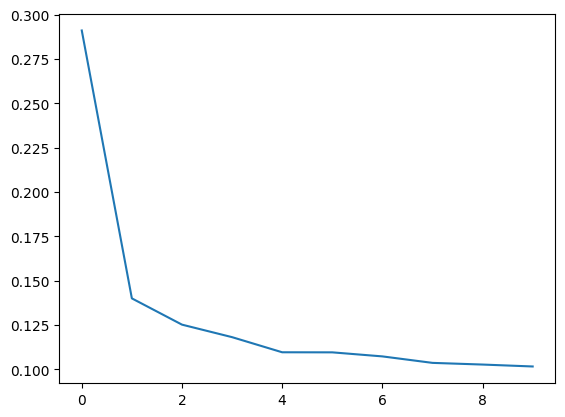

In [18]:
import pandas as pd
# 시각화를 통해 얼마나 손실함수가 줄어들었는지 확인하기
# convert the training history to a dataframe
history_df = pd.DataFrame(history.history)
# use Pandas native plot method
history_df['loss'].plot();

## 4 Overfitting and Underfitting

**learning curve 해석**
- 훈련데이터는 signal과 noise 두가지로 나눌 수 있는데 이때 signal은 새로운 데이터 예측에 도움이 되는 일반화 가능한 부분이고 noise는 훈련 데이터에만 국한된 불필요한 변동임
- learning rate에서 train과 validation의 loss간 차이가 클수록 모델이 학습한 noise가 많다는 의미

**Capacity**
- 모델이 학습할 수 있는 패턴의 크기와 복잡성을 의미함
- 뉴런 수와 연결방식에 따라 결정되고
- Unerfitting의 경우 레이어의 유닛수를 늘리거나 레이어를 추가해 네트워크를 깊게 만드는 방식으로 용량을 증가시켜야 함
- 넓은 네트워크는 단순한 관계를 학습하기에 유리하고 깊은 네트워크는 비선형 관계를 학습하기에 적절함

**Early Stopping**
- 모델이 noise를 너무 많이 학습해 validation set의 loss 가 증가하기 시작하면 훈련을 조기 종료하여 overfitting을 방지함
- 따라서 validation loss 가 가장 낮았을 때의 가중치로 모델을 되돌림
- kears에서는 callback을 통해 기능을 조기종료할 수 있음

In [19]:
model = keras.Sequential([
    layers.Dense(16, activation='relu'),
    layers.Dense(1),
])

wider = keras.Sequential([
    layers.Dense(32, activation='relu'),
    layers.Dense(1),
])

deeper = keras.Sequential([
    layers.Dense(16, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1),
])

In [20]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True,
)
# 20 에포크동안 validation loss가 0.001만큼 개선되지 않았다면 훈련을 중단 의미

In [22]:
import pandas as pd
from IPython.display import display

red_wine = pd.read_csv("C:/Users/sshyu/Downloads/red-wine.csv")

# Create training and validation splits
df_train = red_wine.sample(frac=0.7, random_state=0)
df_valid = red_wine.drop(df_train.index)
display(df_train.head(4))

# Scale to [0, 1]
max_ = df_train.max(axis=0)
min_ = df_train.min(axis=0)
df_train = (df_train - min_) / (max_ - min_)
df_valid = (df_valid - min_) / (max_ - min_)

# Split features and target
X_train = df_train.drop('quality', axis=1)
X_valid = df_valid.drop('quality', axis=1)
y_train = df_train['quality']
y_valid = df_valid['quality']


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1109,10.8,0.470,0.43,2.10,0.171,27.0,66.0,0.99820,3.17,0.76,10.8,6
1032,8.1,0.820,0.00,4.10,0.095,5.0,14.0,0.99854,3.36,0.53,9.6,5
1002,9.1,0.290,0.33,2.05,0.063,13.0,27.0,0.99516,3.26,0.84,11.7,7
487,10.2,0.645,0.36,1.80,0.053,5.0,14.0,0.99820,3.17,0.42,10.0,6


In [23]:
from tensorflow import keras
from tensorflow.keras import layers, callbacks
# 모델의 용량을 증가시키기
early_stopping = callbacks.EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True,
)

model = keras.Sequential([
    layers.Dense(512, activation='relu', input_shape=[11]),
    layers.Dense(512, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dense(1),
])
model.compile(
    optimizer='adam',
    loss='mae',
)

C:\Users\sshyu\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Minimum validation loss: 0.09190740436315536


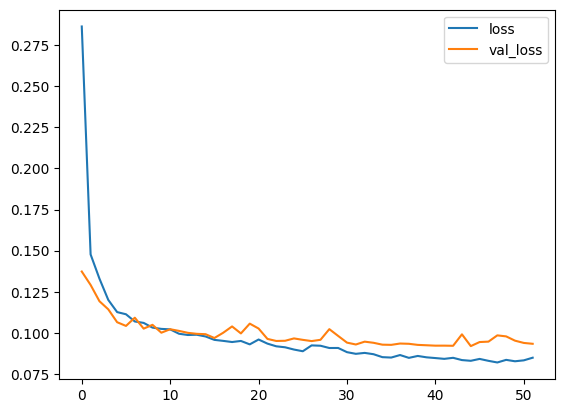

In [24]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=256,
    epochs=500,
    callbacks=[early_stopping], # put your callbacks in a list
    verbose=0,  # turn off training log
)

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();
print("Minimum validation loss: {}".format(history_df['val_loss'].min()))

## 5 Dropout Batch Normalization

**Dropout**
- Overfitting은 모델이 훈련 데이터의 불필요한 패턴을 학습하는데 발생하며 이러한 패턴은 매우 특정한 가중치 조합에 의존하는 경향이 있음
- 따라서 dropout을 통해 특정한 패턴을 깨트려 훈련 과정중 일부 뉴런을 무작위로 제외시킴
- keras에선 rate 변수로 dropout 비율을 설정함


**Batch Normalization**
- 학습 속도와 안정성을 개선하는데 도움이 됨
- 데이터를 표준화하여 훈련시 불안정한 가중치 변동을 방지하기 위해 스케일을 맞추는 것이 중요
- 각 배치를 처리할 때 해당 배치의 평균과 표준편차로 정규화하고 이 매개변수를 통해 데이터를 재스케일링함.
- 모델이 더 작은 epoch로 학습을 완료할 수 있게 도와줌

In [26]:
keras.Sequential([
    # ...
    layers.Dropout(rate=0.3),
    # 적용하고 싶은 레이어 바로 전에 추가
    layers.Dense(16),
    # ...
])

<Sequential name=sequential_10, built=False>

In [28]:
layers.Dense(16, activation='relu'),
# 레이어 바로 뒤에 추가
layers.BatchNormalization(),

(<BatchNormalization name=batch_normalization_1, built=False>,)

In [29]:
layers.Dense(16),
# 레이어와 활성화 함수 전에 추가해도 됨
layers.BatchNormalization(),
layers.Activation('relu'),

(<Activation name=activation, built=False>,)

In [32]:
# 실습해보기
import matplotlib.pyplot as plt

#plt.style.use('seaborn-whitegrid')
# Set Matplotlib defaults
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)


import pandas as pd
red_wine = pd.read_csv("C:/Users/sshyu/Downloads/red-wine.csv")
# Create training and validation splits
df_train = red_wine.sample(frac=0.7, random_state=0)
df_valid = red_wine.drop(df_train.index)

# Split features and target
X_train = df_train.drop('quality', axis=1)
X_valid = df_valid.drop('quality', axis=1)
y_train = df_train['quality']
y_valid = df_valid['quality']


In [33]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(1024, activation='relu', input_shape=[11]),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(1),
])

C:\Users\sshyu\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


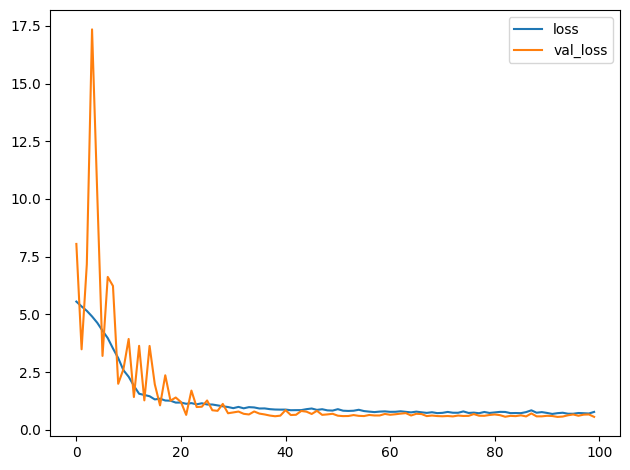

In [34]:
model.compile(
    optimizer='adam',
    loss='mae',
)

history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=256,
    epochs=100,
    verbose=0,
)


# Show the learning curves
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();


## 6 Binary Classification

**이진분류 문제에 신경망 적용하기**
- 분류 문제에서 성과를 측정하는데 사용되는 metric인 Accuracy
- 하지만 accuracy는 계단식 함수이기 때문에 loss function으로 사용할 수 없음.
- 대신 Cross Entropy가 loss function으로 이용되는데 이는 두 확률 분포간 거리 측정 방식으로 모델의 정답 클래스의 확률을 1로 예측할 수록 loss 값이 더 작아짐
- Sigmoid 활성화 함수를 사용하여 예측확률을 0.5를 기준으로 클래스 0,1을 결정함

In [36]:
# 실습해보기
import pandas as pd
from IPython.display import display

ion = pd.read_csv("C:/Users/sshyu/Downloads/ion.csv", index_col=0)
display(ion.head())

df = ion.copy()
df['Class'] = df['Class'].map({'good': 0, 'bad': 1})

df_train = df.sample(frac=0.7, random_state=0)
df_valid = df.drop(df_train.index)

max_ = df_train.max(axis=0)
min_ = df_train.min(axis=0)

df_train = (df_train - min_) / (max_ - min_)
df_valid = (df_valid - min_) / (max_ - min_)
df_train.dropna(axis=1, inplace=True) # drop the empty feature in column 2
df_valid.dropna(axis=1, inplace=True)

X_train = df_train.drop('Class', axis=1)
X_valid = df_valid.drop('Class', axis=1)
y_train = df_train['Class']
y_valid = df_valid['Class']


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V26,V27,V28,V29,V30,V31,V32,V33,V34,Class
1,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,good
2,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,bad
3,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,good
4,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,bad
5,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,good


In [37]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(4, activation='relu', input_shape=[33]),
    layers.Dense(4, activation='relu'),  
    # 활성화함수 sigmoid 사용
    layers.Dense(1, activation='sigmoid'),
])

C:\Users\sshyu\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [38]:
model.compile(
    optimizer='adam',
    # cross entropy로 loss function 사용
    loss='binary_crossentropy',
    metrics=['binary_accuracy'],
)

In [39]:
early_stopping = keras.callbacks.EarlyStopping(
    patience=10,
    min_delta=0.001,
    restore_best_weights=True,
)

history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=512,
    epochs=1000,
    callbacks=[early_stopping],
    verbose=0, # hide the output because we have so many epochs
)

Best Validation Loss: 0.3400
Best Validation Accuracy: 0.8667


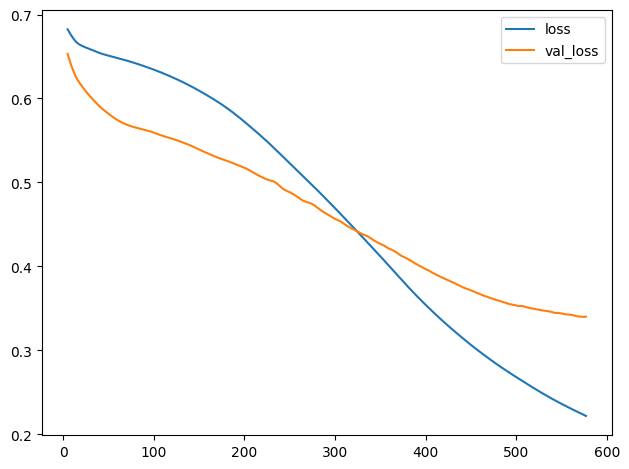

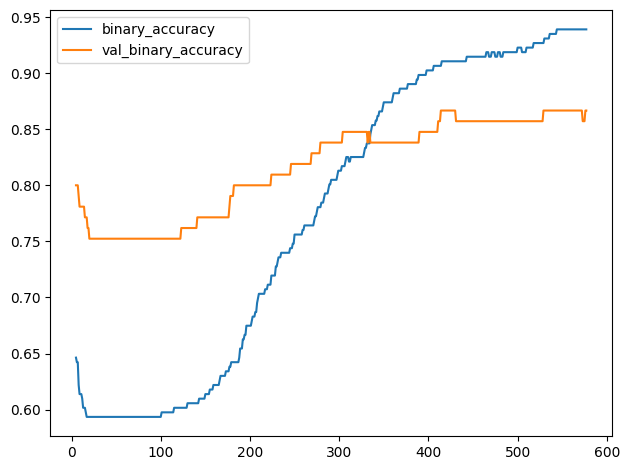

In [40]:
history_df = pd.DataFrame(history.history)
# Start the plot at epoch 5
history_df.loc[5:, ['loss', 'val_loss']].plot()
history_df.loc[5:, ['binary_accuracy', 'val_binary_accuracy']].plot()

print(("Best Validation Loss: {:0.4f}" +\
      "\nBest Validation Accuracy: {:0.4f}")\
      .format(history_df['val_loss'].min(), 
              history_df['val_binary_accuracy'].max()))